# Day_080

### 練習時間
#### 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
#### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.models import Model, Sequential

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128]):
    input_layer =Input(input_shape[1:])
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(input_layer)
        else:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(x)
    
    out = Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model  

In [6]:
# 超參數設定
LEARNING_RATE = [0.01, 0.001, 0.0001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
from keras import optimizers
results = {}
Opts= ['SGD', 'RMSprop', 'AdaGrad', 'Adam']

for lr in LEARNING_RATE:
    for opt in Opts:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'Current opt= {opt}, lr= {lr}\n')
        
        model = build_mlp(input_shape=x_train.shape)
        model.summary()
        if opt == 'SGD' :
            optimizer = optimizers.SGD(lr = lr, nesterov = True, momentum = MOMENTUM)
        elif opt == 'RMSprop': 
            optimizer = optimizers.RMSprop(lr = lr, rho=0.9, epsilon = None, decay = 0.0)
        elif opt == 'AdaGrad':
            optimizer = optimizers.Adagrad(lr = lr, epsilon = None, decay = 0.0)
        elif opt == 'Adam':
            optimizer = optimizers.Adam(lr = lr, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad = False)
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = optimizer )

        model.fit(x_train, y_train, 
              epochs = EPOCHS, 
              batch_size = BATCH_SIZE, 
              validation_data = (x_test, y_test), 
              shuffle = True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "ex- %s" % str(opt)+str('+')+str(lr)
    
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Current opt= SGD, lr= 0.01

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 33s 652us/step - loss: 14.4392 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 32s 648us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 33s 668us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 33s 666us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 35s 697us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 20s 400us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 18s 352us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 31s 630us/step - loss: 14.4101 - acc: 0.1010 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 31s 618us/step - loss: 14.5182 - acc: 0.0991 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 30s 603us/step - loss: 14.4990 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 30s 609us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 31s 618us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 30s 602us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 30s 609us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [

50000/50000 [==============================] - 34s 684us/step - loss: 14.4193 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 33s 660us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 33s 659us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 32s 647us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 33s 663us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 33s 663us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 33s 663us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [

50000/50000 [==============================] - 18s 361us/step - loss: 2.0179 - acc: 0.2738 - val_loss: 1.8659 - val_acc: 0.3447
Epoch 2/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.8104 - acc: 0.3634 - val_loss: 1.7611 - val_acc: 0.3827
Epoch 3/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.7245 - acc: 0.3962 - val_loss: 1.6969 - val_acc: 0.4088
Epoch 4/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.6636 - acc: 0.4164 - val_loss: 1.6397 - val_acc: 0.4178
Epoch 5/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.6156 - acc: 0.4332 - val_loss: 1.6031 - val_acc: 0.4372
Epoch 6/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.5755 - acc: 0.4480 - val_loss: 1.5664 - val_acc: 0.4476
Epoch 7/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.5434 - acc: 0.4576 - val_loss: 1.5379 - val_acc: 0.4573
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 17s 347us/step - loss: 1.8803 - acc: 0.3192 - val_loss: 1.8463 - val_acc: 0.3328
Epoch 3/50
50000/50000 [==============================] - 17s 349us/step - loss: 1.7714 - acc: 0.3625 - val_loss: 1.8440 - val_acc: 0.3546
Epoch 4/50
50000/50000 [==============================] - 17s 349us/step - loss: 1.7071 - acc: 0.3886 - val_loss: 1.7224 - val_acc: 0.3707
Epoch 5/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.6464 - acc: 0.4092 - val_loss: 1.9382 - val_acc: 0.3201
Epoch 6/50
50000/50000 [==============================] - 17s 349us/step - loss: 1.6073 - acc: 0.4280 - val_loss: 1.6366 - val_acc: 0.4143
Epoch 7/50
50000/50000 [==============================] - 17s 348us/step - loss: 1.5629 - acc: 0.4410 - val_loss: 1.7365 - val_acc: 0.3758
Epoch 8/50
50000/50000 [==============================] - 17s 349us/step - loss: 1.5324 - acc: 0.4519 - val_loss: 1.7513 - val_acc: 0.3985
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 17s 350us/step - loss: 1.7158 - acc: 0.3954 - val_loss: 1.7433 - val_acc: 0.3790
Epoch 4/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.6664 - acc: 0.4146 - val_loss: 1.6811 - val_acc: 0.4100
Epoch 5/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.6319 - acc: 0.4272 - val_loss: 1.6390 - val_acc: 0.4159
Epoch 6/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.6027 - acc: 0.4371 - val_loss: 1.6140 - val_acc: 0.4296
Epoch 7/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.5804 - acc: 0.4468 - val_loss: 1.6046 - val_acc: 0.4294
Epoch 8/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.5627 - acc: 0.4525 - val_loss: 1.5899 - val_acc: 0.4381
Epoch 9/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.5451 - acc: 0.4589 - val_loss: 1.6024 - val_acc: 0.4326
Epoch 10/50
50000/50000 [==

50000/50000 [==============================] - 19s 379us/step - loss: 1.6139 - acc: 0.4245 - val_loss: 1.5737 - val_acc: 0.4447
Epoch 4/50
50000/50000 [==============================] - 19s 379us/step - loss: 1.5500 - acc: 0.4491 - val_loss: 1.5717 - val_acc: 0.4477
Epoch 5/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.5056 - acc: 0.4617 - val_loss: 1.5007 - val_acc: 0.4626
Epoch 6/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.4700 - acc: 0.4742 - val_loss: 1.4942 - val_acc: 0.4697
Epoch 7/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.4322 - acc: 0.4893 - val_loss: 1.4830 - val_acc: 0.4725
Epoch 8/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.4125 - acc: 0.4960 - val_loss: 1.4777 - val_acc: 0.4793
Epoch 9/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.3786 - acc: 0.5096 - val_loss: 1.4217 - val_acc: 0.4973
Epoch 10/50
50000/50000 [=============

Epoch 4/50
50000/50000 [==============================] - 16s 323us/step - loss: 2.0129 - acc: 0.3020 - val_loss: 1.9868 - val_acc: 0.3184
Epoch 5/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.9682 - acc: 0.3175 - val_loss: 1.9489 - val_acc: 0.3291
Epoch 6/50
50000/50000 [==============================] - 16s 324us/step - loss: 1.9346 - acc: 0.3287 - val_loss: 1.9191 - val_acc: 0.3385
Epoch 7/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.9077 - acc: 0.3372 - val_loss: 1.8956 - val_acc: 0.3488
Epoch 8/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.8850 - acc: 0.3452 - val_loss: 1.8761 - val_acc: 0.3535
Epoch 9/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.8662 - acc: 0.3521 - val_loss: 1.8578 - val_acc: 0.3569
Epoch 10/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.8491 - acc: 0.3567 - val_loss: 1.8420 - val_acc: 0.3661
Epoch 11/50
50000/50000 [=

Epoch 5/50
50000/50000 [==============================] - 18s 354us/step - loss: 1.6036 - acc: 0.4310 - val_loss: 1.7143 - val_acc: 0.4015
Epoch 6/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.5703 - acc: 0.4472 - val_loss: 1.6043 - val_acc: 0.4281
Epoch 7/50
50000/50000 [==============================] - 18s 354us/step - loss: 1.5404 - acc: 0.4568 - val_loss: 1.6158 - val_acc: 0.4264
Epoch 8/50
50000/50000 [==============================] - 18s 355us/step - loss: 1.5072 - acc: 0.4681 - val_loss: 1.5898 - val_acc: 0.4278
Epoch 9/50
50000/50000 [==============================] - 18s 354us/step - loss: 1.4823 - acc: 0.4776 - val_loss: 1.5577 - val_acc: 0.4403
Epoch 10/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.4596 - acc: 0.4848 - val_loss: 1.5089 - val_acc: 0.4659
Epoch 11/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.4382 - acc: 0.4932 - val_loss: 1.4683 - val_acc: 0.4788
Epoch 12/50
50000/50000 [

Epoch 6/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.8342 - acc: 0.3676 - val_loss: 1.8287 - val_acc: 0.3614
Epoch 7/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.8193 - acc: 0.3714 - val_loss: 1.8170 - val_acc: 0.3709
Epoch 8/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.8066 - acc: 0.3754 - val_loss: 1.8047 - val_acc: 0.3742
Epoch 9/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.7954 - acc: 0.3788 - val_loss: 1.7944 - val_acc: 0.3829
Epoch 10/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.7858 - acc: 0.3839 - val_loss: 1.7844 - val_acc: 0.3846
Epoch 11/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.7770 - acc: 0.3863 - val_loss: 1.7763 - val_acc: 0.3884
Epoch 12/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.7691 - acc: 0.3886 - val_loss: 1.7693 - val_acc: 0.3883
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.4648 - acc: 0.4851 - val_loss: 1.5302 - val_acc: 0.4553
Epoch 8/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.4367 - acc: 0.4945 - val_loss: 1.4758 - val_acc: 0.4757
Epoch 9/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.4136 - acc: 0.5002 - val_loss: 1.4549 - val_acc: 0.4855
Epoch 10/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.3882 - acc: 0.5107 - val_loss: 1.4320 - val_acc: 0.4956
Epoch 11/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.3647 - acc: 0.5222 - val_loss: 1.4383 - val_acc: 0.4904
Epoch 12/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.3492 - acc: 0.5242 - val_loss: 1.4145 - val_acc: 0.4977
Epoch 13/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.3303 - acc: 0.5320 - val_loss: 1.3866 - val_acc: 0.5105
Epoch 14/50
50000/50000

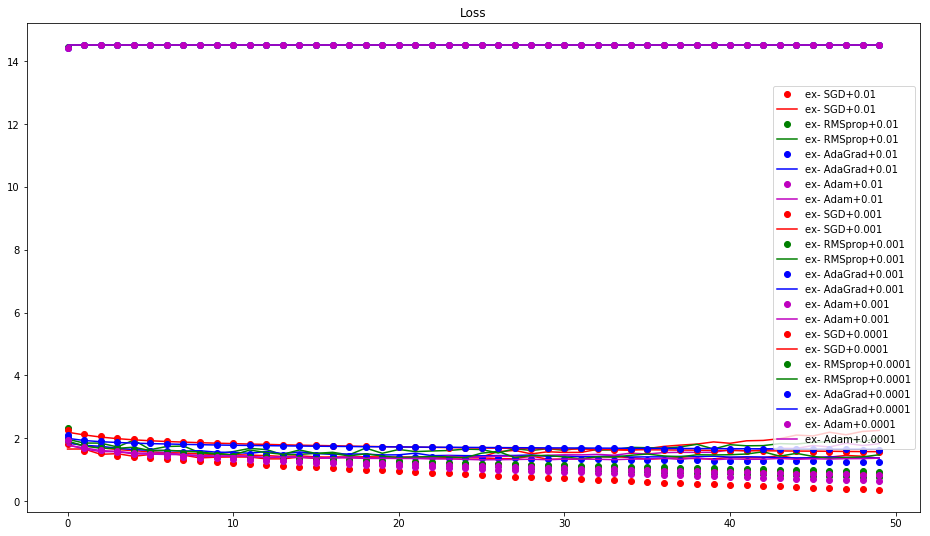

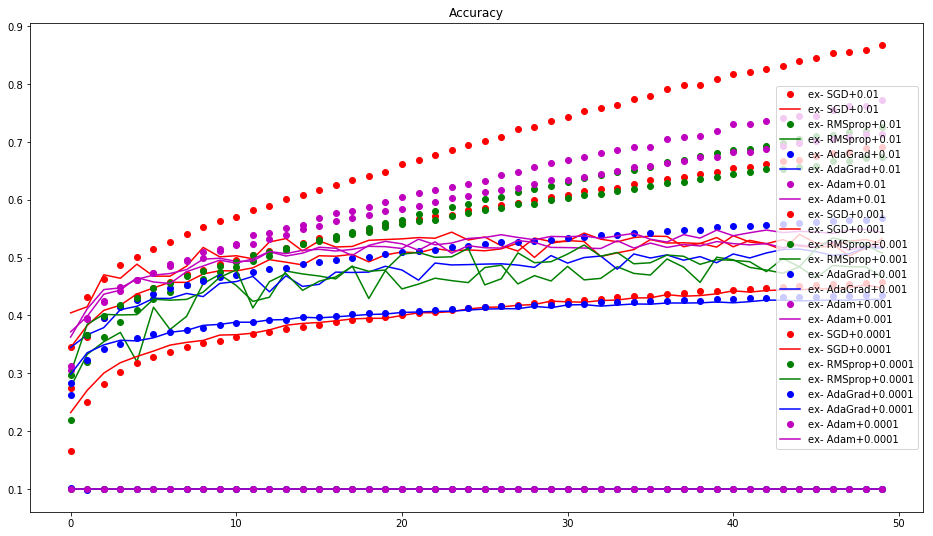

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "m"]

plt.figure(figsize=(16, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], 'o', label = cond, color = color_bar[i%4])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '-', label = cond, color = color_bar[i%4])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], 'o', label = cond, color = color_bar[i%4])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '-', label=cond, color=color_bar[i%4])
    plt.title("Accuracy")   
plt.legend()
plt.show()